In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Utils

In [3]:
tests_path = '../tests/'

In [23]:
def plot_response_analyzis(distances, times, response_nums, labels, xlabel = 'Dystans [km]', fname=None):
    x = np.arange(len(times[0]))
    N = len(times)
    width = 0.6/N 
    fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

    k = -width*(N-1)/2

    for t, r, l in zip(times, response_nums, labels):        
        ax1.bar(x + k, t, width, label=l)
        ax2.scatter(x, r)
        k += width

    ax1.set_ylabel('Czas [s]')
    ax1.set_title('Czas odpowiedzi')
    ax1.set_xticks(x)
    ax1.set_xticklabels(distances)
    ax1.set_xlabel(xlabel)
    ax1.legend()

    ax2.set_ylabel('Liczna wyników')
    ax2.set_title('Liczba znalezionych obiektów')
    ax2.set_xticks(x)
    ax2.set_xticklabels(distances)
    ax2.set_xlabel(xlabel)

    fig.tight_layout()

    if fname is not None:
        fig.savefig(fname)

    plt.show()

## Single object

In [24]:
df = pd.read_csv(tests_path + 'single_object.csv')
df.head()

,distance,object,time,results_num
0,1000,school,1.128004,28
1,5000,school,3.626066,312
2,10000,school,4.319251,505
3,50000,school,7.620389,1127
4,100000,school,14.436623,2525


In [25]:
distances = [x/1000 for x in df['distance'].unique()]
t1 = df[df['object'] == 'school']['time']
r1 = df[df['object'] == 'school']['results_num']
t2 = df[df['object'] == 'swimming_pool']['time']
r2 = df[df['object'] == 'swimming_pool']['results_num']

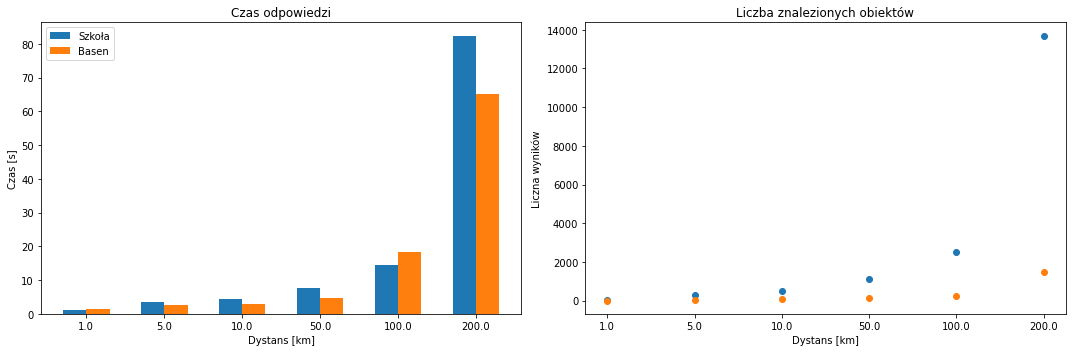

In [26]:
plot_response_analyzis(distances, [t1, t2], [r1, r2], ['Szkoła', 'Basen'])

## Double objects

In [27]:
df = pd.read_csv(tests_path + 'two_objects.csv')
df.head()

,distance,objects,time,results_num
0,1000,school; pharmacy,1.765978,55
1,5000,school; pharmacy,7.901065,482
2,10000,school; pharmacy,8.459457,790
3,50000,school; pharmacy,10.348925,1653
4,100000,school; pharmacy,29.879106,3631


In [28]:
distances = [x/1000 for x in df['distance'].unique()]
t1 = df[df['objects'] == 'school; pharmacy']['time']
r1 = df[df['objects'] == 'school; pharmacy']['results_num']
t2 = df[df['objects'] == 'swimming_pool; park']['time']
r2 = df[df['objects'] == 'swimming_pool; park']['results_num']
t3 = df[df['objects'] == 'hotel; gallery']['time']
r3 = df[df['objects'] == 'hotel; gallery']['results_num']

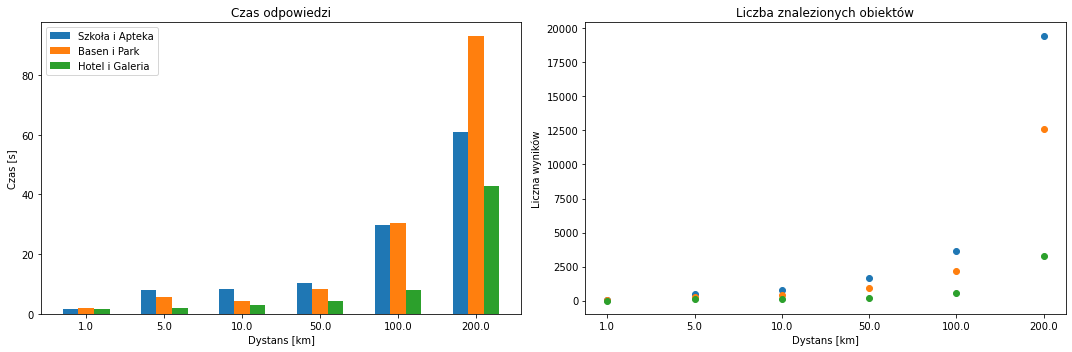

In [29]:
plot_response_analyzis(distances, [t1, t2, t3], [r1, r2, r3], ['Szkoła i Apteka', 'Basen i Park', 'Hotel i Galeria'])

## Time distance

In [31]:
df = pd.read_csv(tests_path + 'time_distance.csv')
df.head()

,time_distance,object,transport,time,results_num
0,10,school,driving-car,3.124415,250
1,30,school,driving-car,4.599112,606
2,60,school,driving-car,6.827260,1020
3,10,school,foot-walking,1.056691,8
4,30,school,foot-walking,3.002769,151


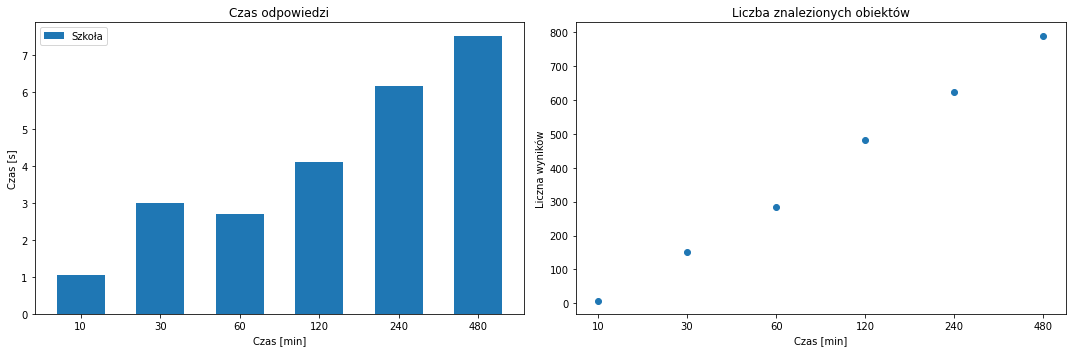

In [32]:
transport = 'foot-walking'
d = df[df['transport'] == transport]['time_distance']
t = df[df['transport'] == transport]['time']
r = df[df['transport'] == transport]['results_num']
plot_response_analyzis(d, [t], [r], ['Szkoła'], xlabel='Czas [min]')

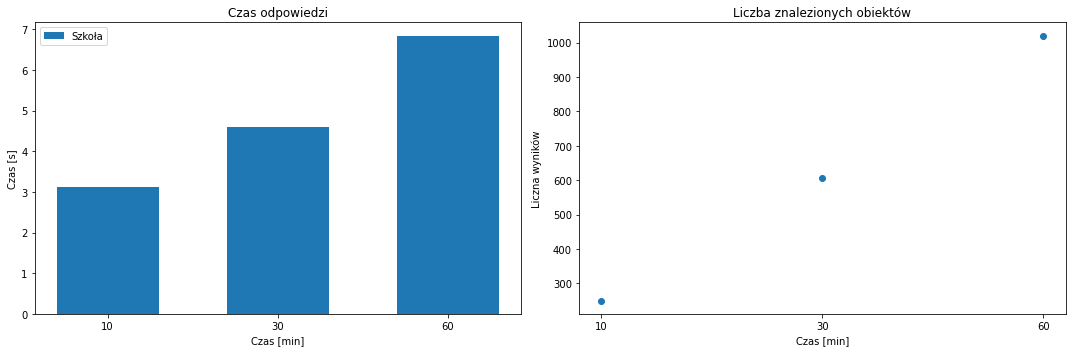

In [34]:
transport = 'driving-car'
d = df[df['transport'] == transport]['time_distance']
t = df[df['transport'] == transport]['time']
r = df[df['transport'] == transport]['results_num']
plot_response_analyzis(d, [t], [r], ['Szkoła'], xlabel='Czas [min]')

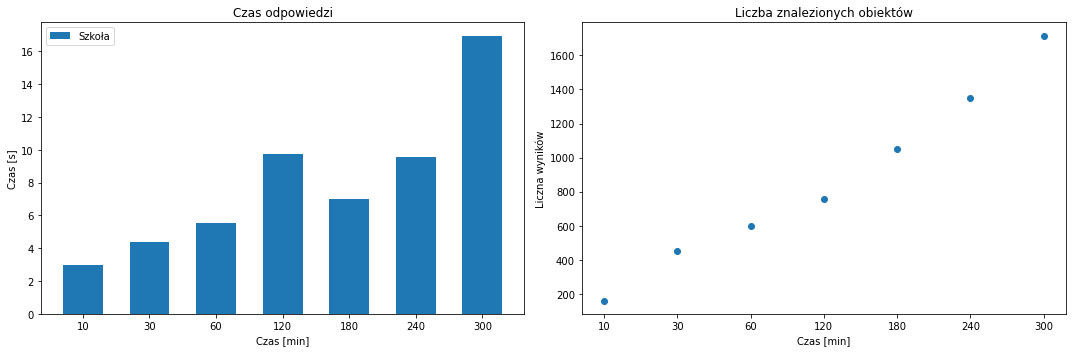

In [33]:
transport = 'cycling-regular'
d = df[df['transport'] == transport]['time_distance']
t = df[df['transport'] == transport]['time']
r = df[df['transport'] == transport]['results_num']
plot_response_analyzis(d, [t], [r], ['Szkoła'], xlabel='Czas [min]')

## Relative object

In [88]:
df = pd.read_csv(tests_path + 'relative_objects.csv')
df.head()

,distance,main_object,relative_distance,relative_object,time,results_num
0,5000,police,500,hotel,2.516042,30
1,5000,police,1000,hotel,2.697449,61
2,5000,police,5000,hotel,3.064192,69
3,10000,police,500,hotel,1.992599,46
4,10000,police,1000,hotel,1.774894,87


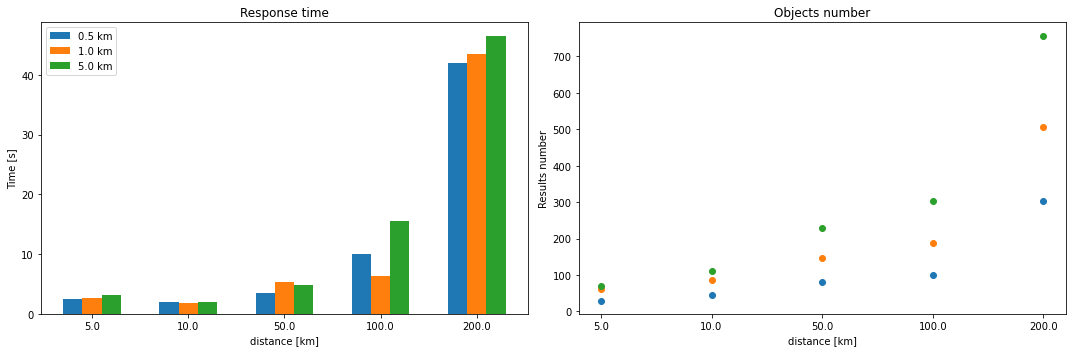

In [90]:
distances = [x/1000 for x in df['distance'].unique()]
t1 = df[df['relative_distance'] == 500]['time']
r1 = df[df['relative_distance'] == 500]['results_num']
t2 = df[df['relative_distance'] == 1000]['time']
r2 = df[df['relative_distance'] == 1000]['results_num']
t3 = df[df['relative_distance'] == 5000]['time']
r3 = df[df['relative_distance'] == 5000]['results_num']

plot_response_analyzis(distances, [t1, t2, t3], [r1, r2, r3], [str(x/1000) + ' km' for x in [500, 1000, 5000]])